# Mapreader Workshop - June 7th-8th 2023

----

# Download

MapReader’s ``Download`` subpackage is used to download maps stored on as XYZ tile layers on a tile server. It contains two classes for downloading maps:

1. ``SheetDownloader`` - This can be used to download map sheets and relies on information provided in a metadata json file.

2. ``Downloader`` - This is used to download maps using polygons and can be used even if you don’t have a metadata json file.

In this workshop, we will use the ``SheetDownloader`` along with metadata stored in the ``persistant_data`` directory of the mapreader repository.

## Import the ``SheetDownloader`` and create your ``my_ts`` object.

In [1]:
from mapreader import SheetDownloader

In [2]:
download_url="https://geo.nls.uk/maps/os/1inch_2nd_ed/{z}/{x}/{y}.png"
metadata_path="../../persistent_data/metadata_OS_One_Inch_GB_WFS_light.json"

In [3]:
my_ts = SheetDownloader(metadata_path, download_url)

[INFO] Metadata file has 480 item(s).


You can view the boundaries of the map sheets included in your metadata by calling the ``.plot_all_metadata_on_map()`` method:

In [ ]:
my_ts.plot_all_metadata_on_map()

The numbers shown are the WFS ID numbers of the maps.

## Select maps to download

Your ``SheetDownloader`` instance (``my_ts``) can be used to query and download map sheets using a number of methods:

1. Any which are within or intersect/overlap with a polygon.
2.  Any which contain a set of given coordinates.
3. Any which intersect with a line.
4. By WFS ID numbers.
5. By searching for a string within a metadata field.

These methods can be used to either directly download maps, or to create a list of queries which can interacted with and downloaded subsequently.

We will be using the querying option.

### 1. Finding map sheets which overlap or intersect with a polygon.

The ``.query_map_sheets_by_polygon()`` and ``.download_map_sheets_by_polygon()`` methods can be used find and download map sheets which are within or intersect/overlap with a [shapely.Polygon](https://shapely.readthedocs.io/en/stable/reference/shapely.Polygon.html#shapely.Polygon).

These methods have two modes:

- "within" - This finds map sheets whose bounds are completely within the given polygon.
- "intersects" - This finds map sheets which intersect/overlap with the given polygon.

The ``mode`` can be selected by specifying ``mode="within"`` or ``mode="intersects"``.

#### Create a polygon

In [5]:
from mapreader import create_polygon_from_latlons

In [6]:
my_polygon = create_polygon_from_latlons(55.6, -3.5, 56, -2.8)

#### Find maps

To find map sheets which fall **within** the bounds of this polygon:

In [7]:
my_ts.query_map_sheets_by_polygon(my_polygon, mode="within", print=True)

[INFO] No query results found/saved.


Or, to find map sheets which **intersect** with this polygon:

> **_NOTE:_** This will overwrite your existing found queries unless you use the ``append=True`` argument.

In [8]:
my_ts.query_map_sheets_by_polygon(my_polygon, mode="intersects", print=True)

Query results:
URL:     	https://maps.nls.uk/view/74488618
coordinates (bounds):  	(-3.59999994, 55.52000003, -2.97999993, 55.79000003)
--------------------
URL:     	https://maps.nls.uk/view/74488621
coordinates (bounds):  	(-2.98999993, 55.52000003, -2.35999993, 55.78000003)
--------------------
URL:     	https://maps.nls.uk/view/74488700
coordinates (bounds):  	(-3.59999993, 55.78000003, -2.96999993, 56.05000003)
--------------------
URL:     	https://maps.nls.uk/view/74488705
coordinates (bounds):  	(-2.97999993, 55.78000003, -2.34999993, 56.04000003)
--------------------


To see what you've found, plot your query results on a map using the ``.plot_queries_on_map()`` method:

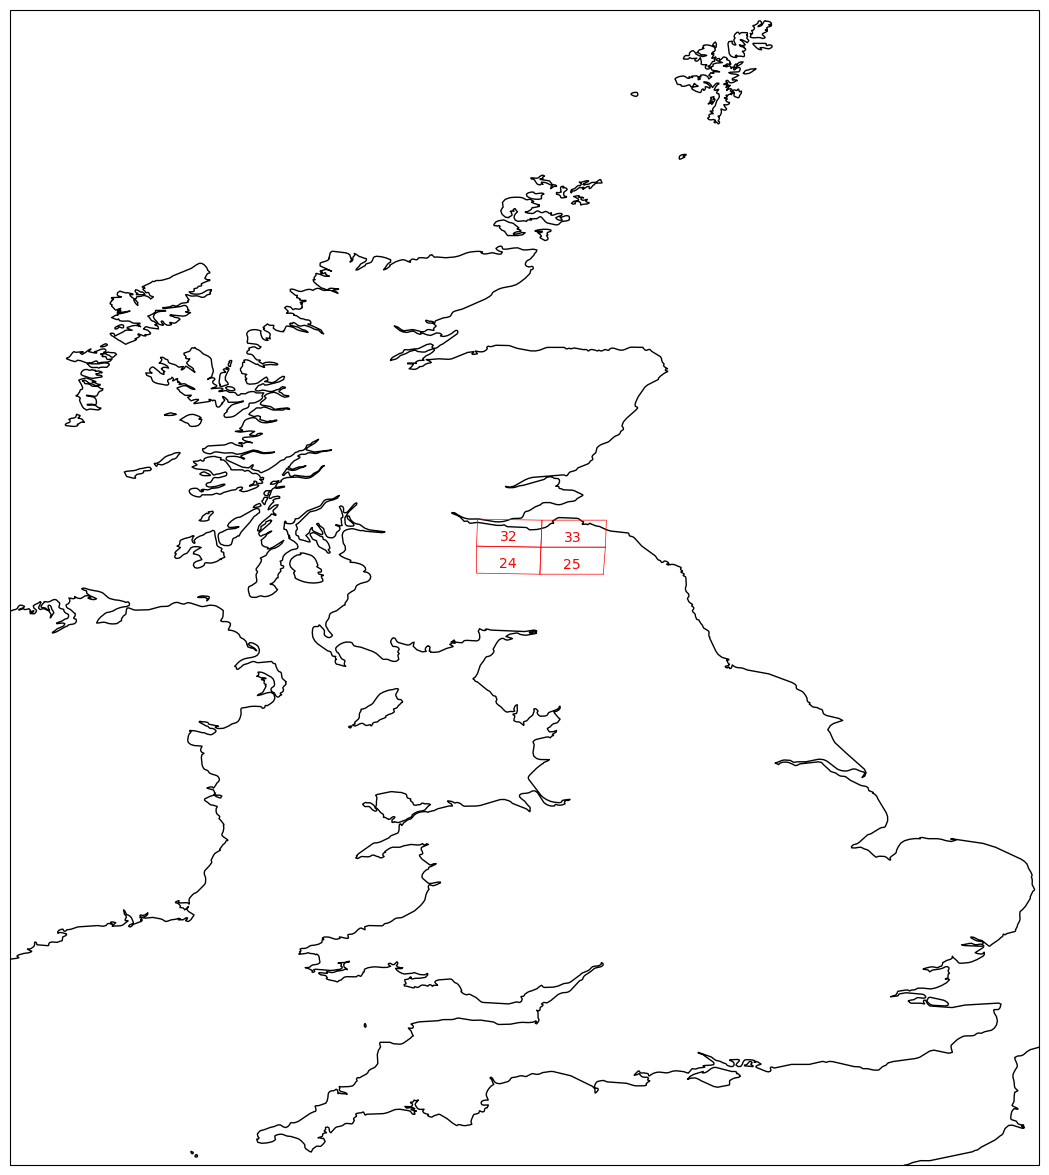

In [9]:
my_ts.plot_queries_on_map(map_extent='uk')

### 2. Finding map sheets which contain a set of coordinates.

The ``.query_map_sheets_by_coordinates()`` and ``.download_map_sheets_by_coordinates()`` methods can be used find and download map sheets which contain a set of coordinates.

In [10]:
my_ts.query_map_sheets_by_coordinates((-4.5, 55.4), print=True, append=True)

Query results:
URL:     	https://maps.nls.uk/view/74488618
coordinates (bounds):  	(-3.59999994, 55.52000003, -2.97999993, 55.79000003)
--------------------
URL:     	https://maps.nls.uk/view/74488621
coordinates (bounds):  	(-2.98999993, 55.52000003, -2.35999993, 55.78000003)
--------------------
URL:     	https://maps.nls.uk/view/74488700
coordinates (bounds):  	(-3.59999993, 55.78000003, -2.96999993, 56.05000003)
--------------------
URL:     	https://maps.nls.uk/view/74488705
coordinates (bounds):  	(-2.97999993, 55.78000003, -2.34999993, 56.04000003)
--------------------
URL:     	https://maps.nls.uk/view/74488586
coordinates (bounds):  	(-4.81999994, 55.27000003, -4.20999994, 55.53000003)
--------------------


We've used the ``append=True`` argument and so, if you plot your found queries, you will see a new map sheet has been added to your queries list.

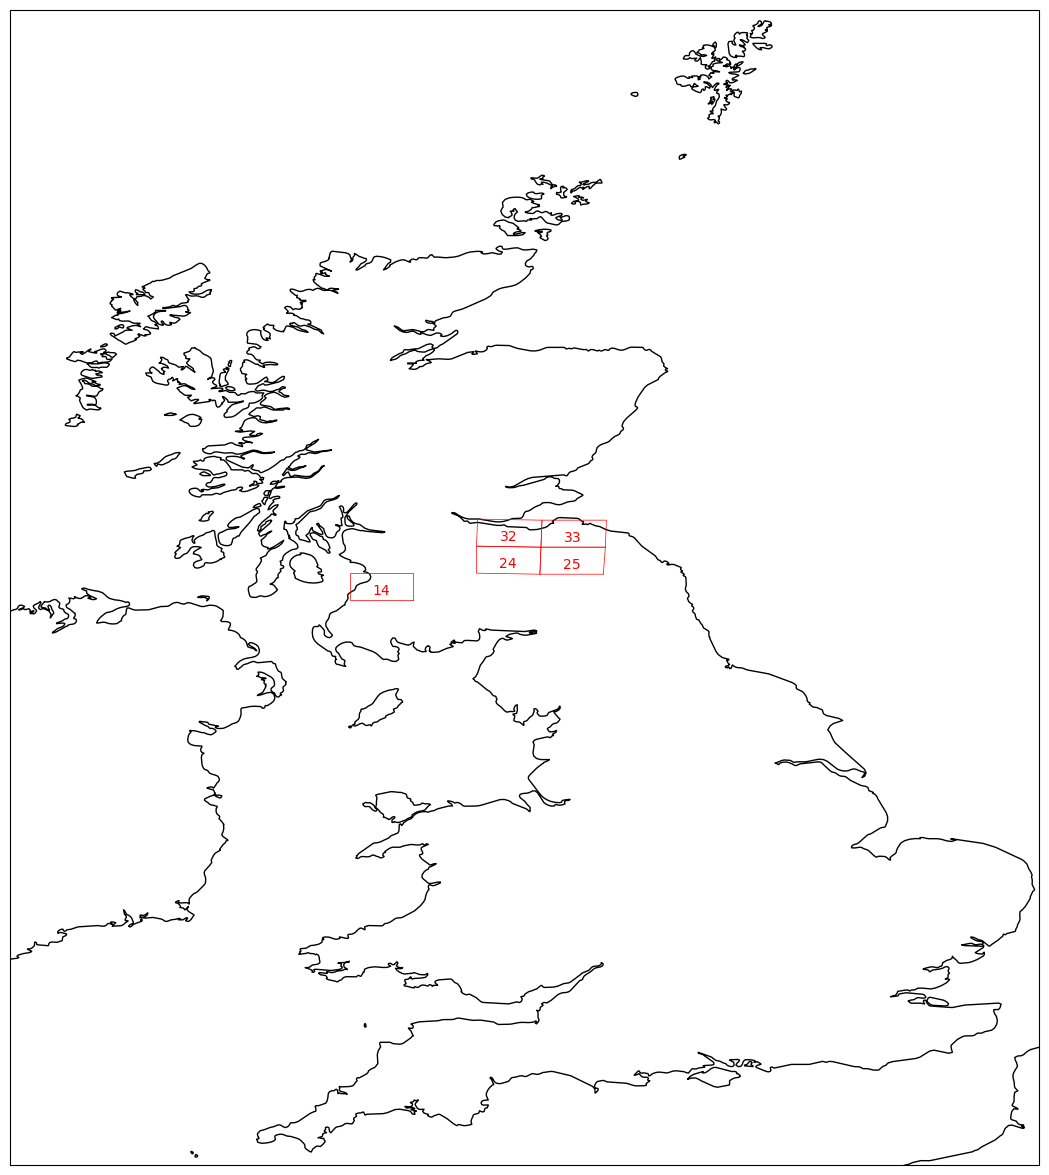

In [11]:
my_ts.plot_queries_on_map(map_extent='uk')

### 3. Finding map sheets which intersect with a line.

The ``.query_map_sheets_by_line()`` and ``.download_map_sheets_by_line()`` methods can be used find and download map sheets which intersect with a [shapely.LineString](https://shapely.readthedocs.io/en/stable/reference/shapely.LineString.html#shapely.LineString).

#### Create a line

In [12]:
from mapreader import create_line_from_latlons

In [13]:
my_line = create_line_from_latlons((56.5, -5), (57.0, -4.5))

#### Find maps

> **_NOTE:_** In the previous examples, we used the ``print=True`` argument to print our query results each time. We've now removed this so query results aren't being printed.

In [14]:
my_ts.query_map_sheets_by_line(my_line, append=True)

Again, after plotting your queries on a map, you'll see some new map sheets have been added to your queries list.

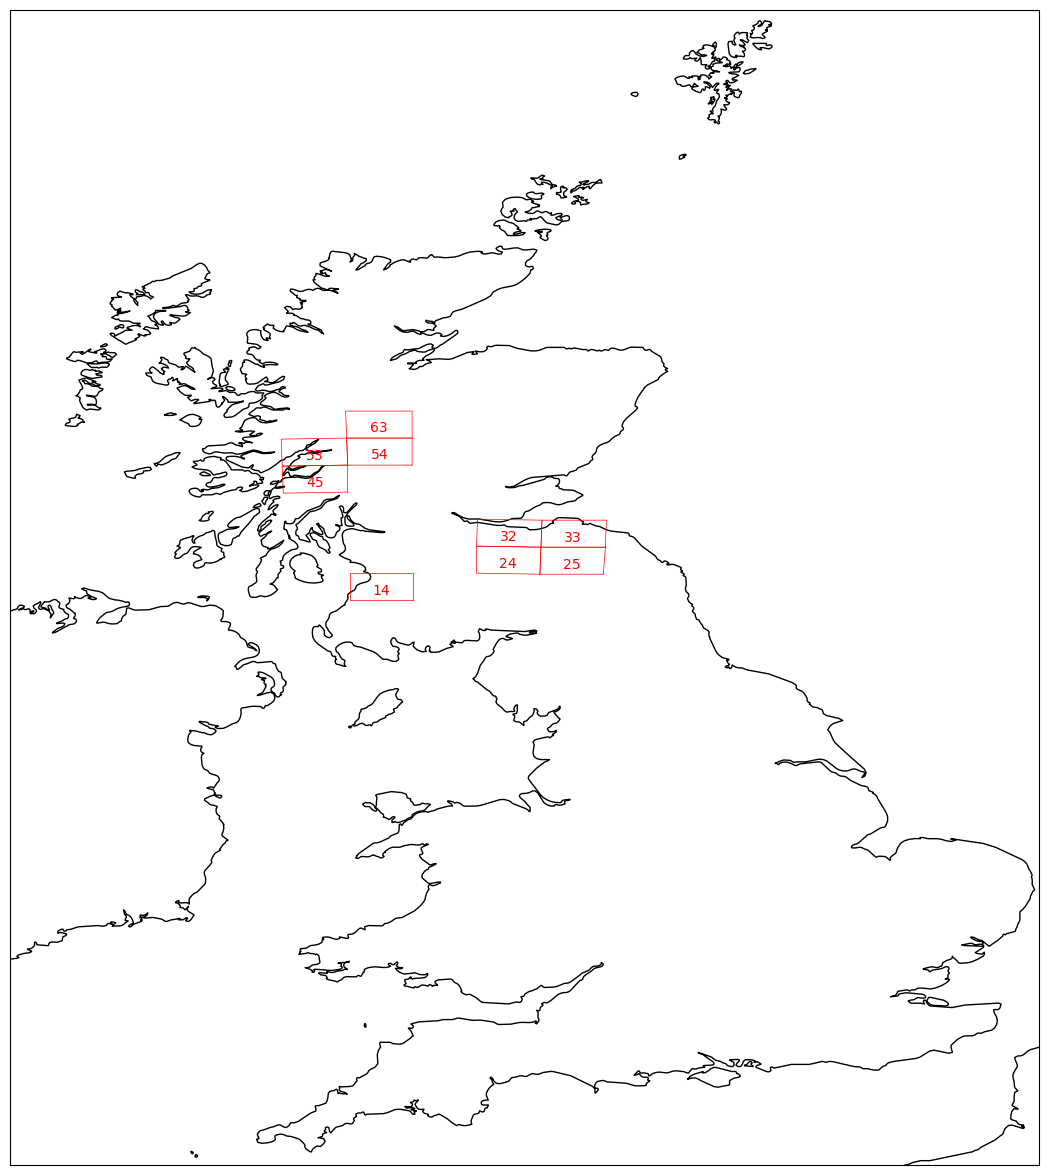

In [15]:
my_ts.plot_queries_on_map(map_extent='uk')

### 4. Finding map sheets using their WFS ID numbers.

The ``.query_map_sheets_by_wfs_ids()`` and ``.download_map_sheets_by_wfs_ids()`` methods can be used find and download map sheets using their WFS ID numbers.

These are the numbers that are being plotted on the above maps.

#### One map at a time

In [16]:
my_ts.query_map_sheets_by_wfs_ids(12, append=True)

#### Multiple maps at a time

In [17]:
my_ts.query_map_sheets_by_wfs_ids([30,37,38], append=True)

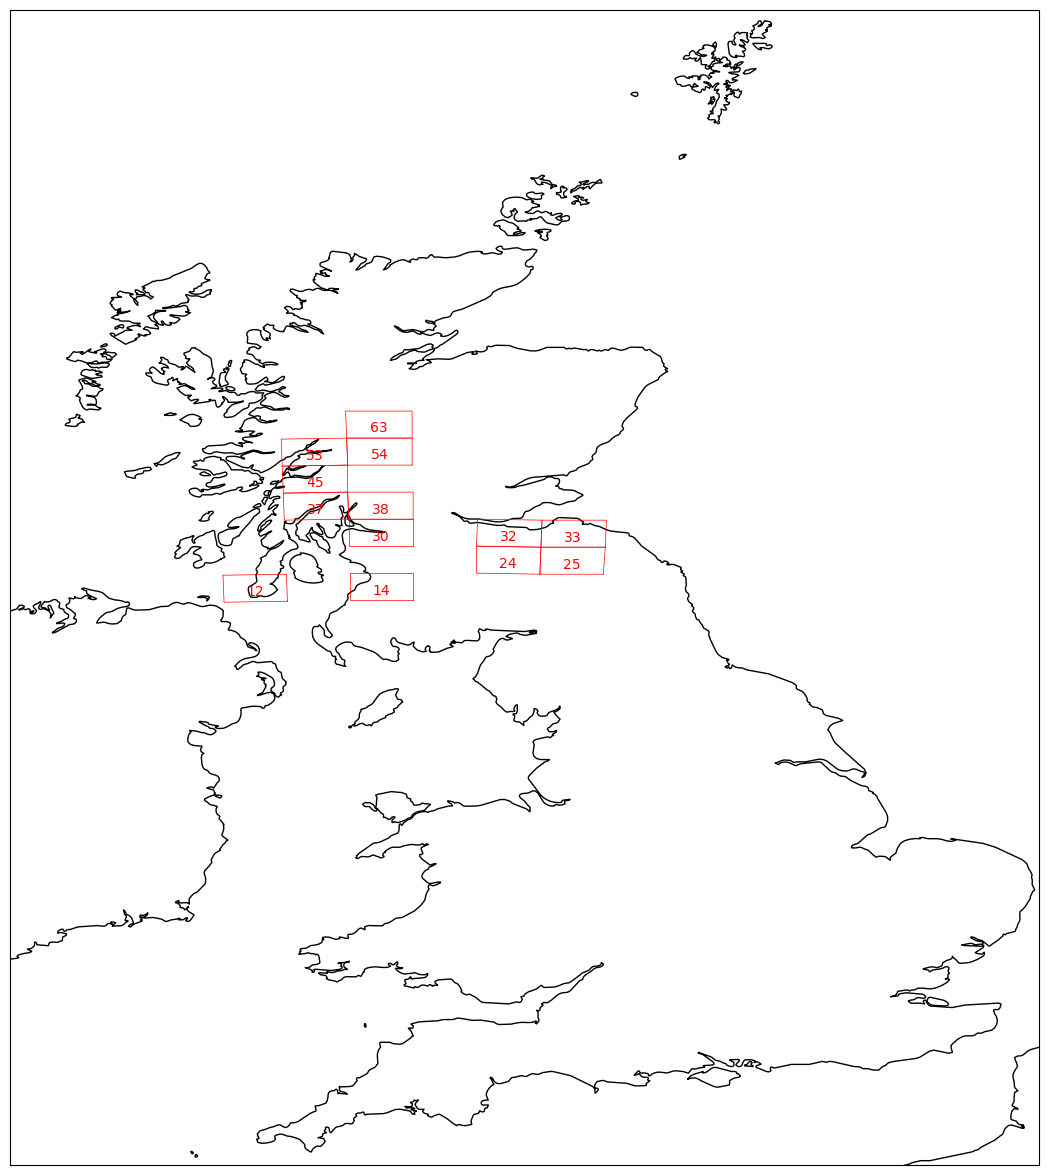

In [18]:
my_ts.plot_queries_on_map(map_extent='uk')

### 5. Finding map sheets by searching for a string in their metadata.

The ``.query_map_sheets_by_string()`` and ``.download_map_sheets_by_string()`` methods can be used find and download map sheets by searching for a string in their metadata.

These methods use [regex string searching](https://docs.python.org/3/library/re.html) to find map sheets whose metadata contains a given string. 
Wildcards and regular expressions can therefore be used in the ``string`` argument.

In [19]:
my_ts.query_map_sheets_by_string("irling", append=True)

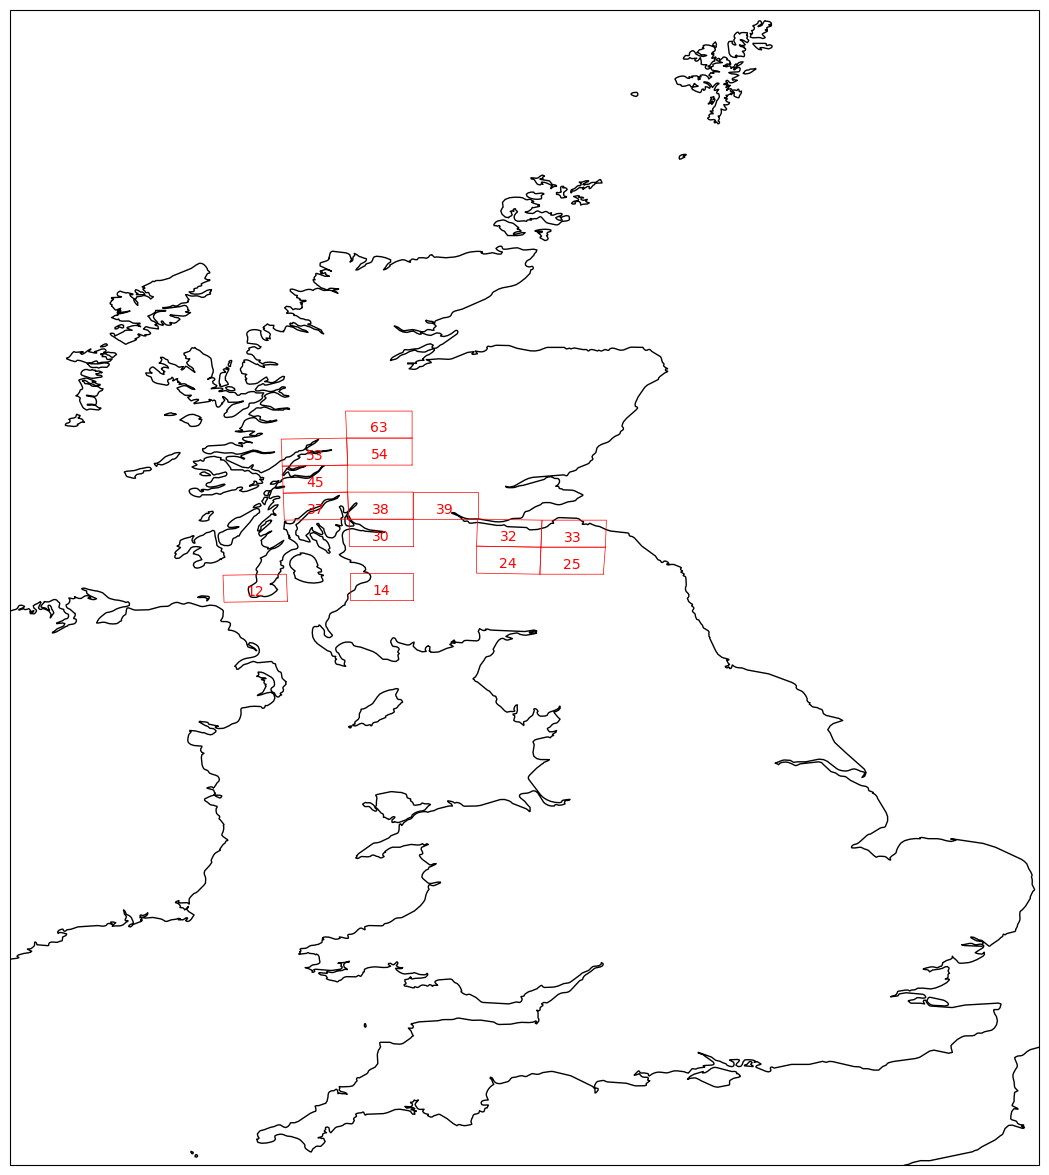

In [20]:
my_ts.plot_queries_on_map(map_extent="uk")

The above query command will search for "irling" in **all** metadata fields.

If instead, you'd like to search a particular metadata field (e.g. "IMAGEURL"), you can specify the ``keys`` argument.

> _**NOTE**_: You will need to have an idea of the structure of your metadata in order to do this. Use ``my_ts.features[0]`` to view the metadata for the first map sheet in our metadata, if you would like to see how our metadata is structured.

In [21]:
my_ts.query_map_sheets_by_string("74487492", keys=["properties","IMAGEURL"], append=True)

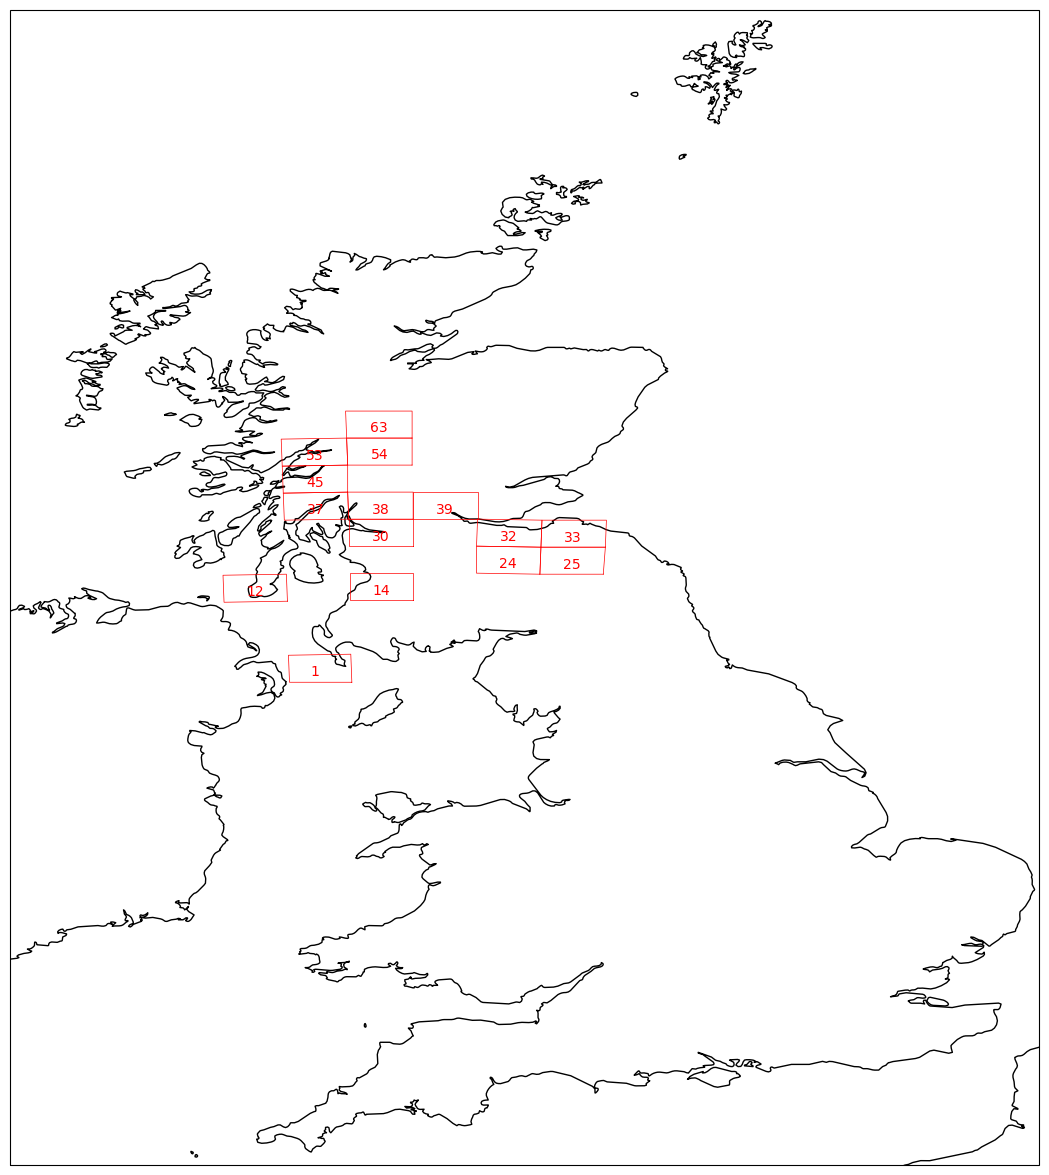

In [22]:
my_ts.plot_queries_on_map(map_extent="uk")

### Print found queries

You can print your queries list at any time using the ``.print_found_queries()`` method.

This means you can run multiple queries and check what you've found at the end.

In [23]:
my_ts.print_found_queries()

Query results:
URL:     	https://maps.nls.uk/view/74488618
coordinates (bounds):  	(-3.59999994, 55.52000003, -2.97999993, 55.79000003)
--------------------
URL:     	https://maps.nls.uk/view/74488621
coordinates (bounds):  	(-2.98999993, 55.52000003, -2.35999993, 55.78000003)
--------------------
URL:     	https://maps.nls.uk/view/74488700
coordinates (bounds):  	(-3.59999993, 55.78000003, -2.96999993, 56.05000003)
--------------------
URL:     	https://maps.nls.uk/view/74488705
coordinates (bounds):  	(-2.97999993, 55.78000003, -2.34999993, 56.04000003)
--------------------
URL:     	https://maps.nls.uk/view/74488586
coordinates (bounds):  	(-4.81999994, 55.27000003, -4.20999994, 55.53000003)
--------------------
URL:     	https://maps.nls.uk/view/74489053
coordinates (bounds):  	(-5.46999993, 56.30000003, -4.83999993, 56.57000003)
--------------------
URL:     	https://maps.nls.uk/view/74490356
coordinates (bounds):  	(-5.47999993, 56.56000003, -4.83999993, 56.83000003)
------------

## Download query results

To download your maps, you need to first set a zoom level using the ``.get_grid_bb()`` method.

In [24]:
my_ts.get_grid_bb(14)

Then, you can download your map sheets using ``.download_map_sheets_by_queries()``:

> _**NOTE**_: We have left ``path_save`` and ``metadata_fname`` as the default values, so maps will be saved in ``"./maps/"`` and their metadata will be saved as ``"./maps/metadata.csv"``.

In [43]:
my_ts.download_map_sheets_by_queries(overwrite=True)

[INFO] Downloaded "map_74488618.png"
[INFO] Downloaded "map_74488621.png"
[INFO] Downloaded "map_74488700.png"
[INFO] Downloaded "map_74488705.png"
[INFO] Downloaded "map_74488586.png"
[INFO] Downloaded "map_74489053.png"
[INFO] Downloaded "map_74490356.png"
[INFO] Downloaded "map_74490359.png"
[INFO] Downloaded "map_74490389.png"
[INFO] Downloaded "map_74488580.png"
[INFO] Downloaded "map_74488689.png"
[INFO] Downloaded "map_74488722.png"
[INFO] Downloaded "map_74488742.png"
[INFO] Downloaded "map_74489035.png"
[INFO] Downloaded "map_74487492.png"


-----

# Load

MapReader’s ``Load`` subpackage is used to load, visualise and patchify images (e.g. maps) saved locally.

## Import the ``loader`` and create your ``my_files`` object.

In [1]:
from mapreader import loader

In [2]:
my_files = loader("./maps/*png")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:17<00:00,  1.17s/it]


### Add metadata

Add the ``metadata.csv`` file that was created when downloading your maps.

In [3]:
my_files.add_metadata("./maps/metadata.csv")

In [4]:
parent_df, patch_df = my_files.convert_images()
parent_df.head()

parent_id                                         image_path  \
map_74489053.png      None  /Users/rwood/LwM/MapReader/worked_examples/geo...   
map_74487492.png      None  /Users/rwood/LwM/MapReader/worked_examples/geo...   
map_74488689.png      None  /Users/rwood/LwM/MapReader/worked_examples/geo...   
map_74490359.png      None  /Users/rwood/LwM/MapReader/worked_examples/geo...   
map_74488700.png      None  /Users/rwood/LwM/MapReader/worked_examples/geo...   

                            shape              name  \
map_74489053.png  (5888, 7424, 4)  map_74489053.png   
map_74487492.png  (5888, 7424, 4)  map_74487492.png   
map_74488689.png  (5632, 7424, 4)  map_74488689.png   
map_74490359.png  (5888, 7424, 4)  map_74490359.png   
map_74488700.png  (5888, 7424, 4)  map_74488700.png   

                                                url  \
map_74489053.png  https://maps.nls.uk/view/74489053   
map_74487492.png  https://maps.nls.uk/view/74487492   
map_74488689.png  https://maps.nls.uk/view/74488689   
map_74490359.png  https://maps.nls.uk/view/74490359   
map_74488700.png  https://maps.nls.uk/view/74488700   

                                                        coordinates  \
map_74489053.png  (-5.47119140625, 56.30434864830832, -4.8559570...   
map_74487492.png  (-5.42724609375, 54.48280455958255, -4.8120117...   
map_74488689.png  (-4.833984375, 55.80128097118045, -4.21875, 56...   
map_74490359.png  (-4.85595703125, 56.57158903959722, -4.2407226...   
map_74488700.png  (-3.603515625, 55.78892895389263, -2.98828125,...   

                        crs  published_date  \
map_74489053.png  EPSG:4326            1897   
map_74487492.png  EPSG:4326            1896   
map_74488689.png  EPSG:4326            1898   
map_74490359.png  EPSG:4326            1896   
map_74488700.png  EPSG:4326            1898   

                                              grid_bb  
map_74489053.png  [(14, 7943, 5055)x(14, 7971, 5077)]  
map_74487492.png  [(14, 7945, 5201)x(14, 7973, 5223)]  
map_74488689.png  [(14, 7972, 5097)x(14, 8000, 5118)]  
map_74490359.png  [(14, 7971, 5033)x(14, 7999, 5055)]  
map_74488700.png  [(14, 8028, 5097)x(14, 8056, 5119)]

## Patchify

The ``.patchify_all()`` method is used to slice your map images into patches. 

The method used to patchify your maps is selected by specifying ``method="pixel"`` or ``method="meters"``. This determines whether your ``patch_size`` is interpreted with units of ``pixel`` or ``meters``. 

#### Patchify by pixel

In [5]:
my_files.patchify_all(method="pixel", patch_size=500)

[INFO] Saving patches in directory named "patches_500_pixel".


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:19<00:00,  1.29s/it]


#### Patchify by meters

You will only be able to use ``method="meters"`` if you have coordinates saved for each of your map images. These can be added by running either ``.add_metadata()`` or, if your images contain georefencing information, ``.add_geo_info()``.

> _**NOTE**_: We have used ``add_to_parents=False`` here so that these patches are not added to the ``my_files`` object. This is simply so that we don't have two sets of patches added after running both ``.patchify_all()`` commands.

In [6]:
my_files.patchify_all(method="meters", patch_size=5000, add_to_parents=False)

[INFO] Saving patches in directory named "patches_5000_meters".


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 1170.42it/s]


You will see your patches are saved in separate directories, each indicating the patch size and method used.

### Visualise patches

``MapReader`` also contains some useful functions for visualising your patches.

For example, the ``.show_sample()`` method can be used to show a random sample of your patches:

In [ ]:
my_files.show_sample(num_samples=3, tree_level="patch", random_seed=1)

You may also want to see all the patches created from one of your parent images. 
This can be done using the ``.show_parent()`` method:

In [8]:
my_files.show_parent("map_74489053.png")

  0%|                                                                                                                                    | 0/1 [00:01<?, ?it/s]


UnboundLocalError: local variable 'values_plot' referenced before assignment

The ``.calc_pixel_stats()`` method can be used to calculate statistics on the pixel intensities of each patch.

This can be useful when annotating patches, as patches with higher pixel intensities contain more colour (i.e. are more likely to contain features as opposed to be blank space).

In [9]:
my_files.calc_pixel_stats()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:18<00:00,  1.26s/it]


By running the ``.convert_images()`` method, you will see that the means and standard deviations of pixel intensities of each patch have been added to your ``my_files`` object.

In [10]:
parent_df, patch_df = my_files.convert_images()
patch_df.head()

parent_id  \
patch-0-0-500-500-#map_74489053.png#.png      map_74489053.png   
patch-0-500-500-1000-#map_74489053.png#.png   map_74489053.png   
patch-0-1000-500-1500-#map_74489053.png#.png  map_74489053.png   
patch-0-1500-500-2000-#map_74489053.png#.png  map_74489053.png   
patch-0-2000-500-2500-#map_74489053.png#.png  map_74489053.png   

                                                                                     image_path  \
patch-0-0-500-500-#map_74489053.png#.png      /Users/rwood/LwM/MapReader/worked_examples/geo...   
patch-0-500-500-1000-#map_74489053.png#.png   /Users/rwood/LwM/MapReader/worked_examples/geo...   
patch-0-1000-500-1500-#map_74489053.png#.png  /Users/rwood/LwM/MapReader/worked_examples/geo...   
patch-0-1500-500-2000-#map_74489053.png#.png  /Users/rwood/LwM/MapReader/worked_examples/geo...   
patch-0-2000-500-2500-#map_74489053.png#.png  /Users/rwood/LwM/MapReader/worked_examples/geo...   

                                                      shape  \
patch-0-0-500-500-#map_74489053.png#.png      (500, 500, 4)   
patch-0-500-500-1000-#map_74489053.png#.png   (500, 500, 4)   
patch-0-1000-500-1500-#map_74489053.png#.png  (500, 500, 4)   
patch-0-1500-500-2000-#map_74489053.png#.png  (500, 500, 4)   
patch-0-2000-500-2500-#map_74489053.png#.png  (500, 500, 4)   

                                                      pixel_bounds  \
patch-0-0-500-500-#map_74489053.png#.png          (0, 0, 500, 500)   
patch-0-500-500-1000-#map_74489053.png#.png    (0, 500, 500, 1000)   
patch-0-1000-500-1500-#map_74489053.png#.png  (0, 1000, 500, 1500)   
patch-0-1500-500-2000-#map_74489053.png#.png  (0, 1500, 500, 2000)   
patch-0-2000-500-2500-#map_74489053.png#.png  (0, 2000, 500, 2500)   

                                                                                    coordinates  \
patch-0-0-500-500-#map_74489053.png#.png      (-5.47119140625, 56.30434864830832, -5.4297559...   
patch-0-500-500-1000-#map_74489053.png#.png   (-5.47119140625, 56.327042295666416, -5.429755...   
patch-0-1000-500-1500-#map_74489053.png#.png  (-5.47119140625, 56.349735943024506, -5.429755...   
patch-0-1500-500-2000-#map_74489053.png#.png  (-5.47119140625, 56.3724295903826, -5.42975590...   
patch-0-2000-500-2500-#map_74489053.png#.png  (-5.47119140625, 56.39512323774069, -5.4297559...   

                                                    crs  \
patch-0-0-500-500-#map_74489053.png#.png      EPSG:4326   
patch-0-500-500-1000-#map_74489053.png#.png   EPSG:4326   
patch-0-1000-500-1500-#map_74489053.png#.png  EPSG:4326   
patch-0-1500-500-2000-#map_74489053.png#.png  EPSG:4326   
patch-0-2000-500-2500-#map_74489053.png#.png  EPSG:4326   

                                                                                        polygon  \
patch-0-0-500-500-#map_74489053.png#.png      POLYGON ((-5.429755901468211 56.30434864830832...   
patch-0-500-500-1000-#map_74489053.png#.png   POLYGON ((-5.429755901468211 56.32704229566641...   
patch-0-1000-500-1500-#map_74489053.png#.png  POLYGON ((-5.429755901468211 56.34973594302450...   
patch-0-1500-500-2000-#map_74489053.png#.png  POLYGON ((-5.429755901468211 56.3724295903826,...   
patch-0-2000-500-2500-#map_74489053.png#.png  POLYGON ((-5.429755901468211 56.39512323774069...   

                                              mean_pixel_R  mean_pixel_G  \
patch-0-0-500-500-#map_74489053.png#.png          0.714262      0.705071   
patch-0-500-500-1000-#map_74489053.png#.png       0.755440      0.746897   
patch-0-1000-500-1500-#map_74489053.png#.png      0.771804      0.763524   
patch-0-1500-500-2000-#map_74489053.png#.png      0.728173      0.719482   
patch-0-2000-500-2500-#map_74489053.png#.png      0.796353      0.787822   

                                              mean_pixel_B  mean_pixel_A  \
patch-0-0-500-500-#map_74489053.png#.png          0.652198      0.999675   
patch-0-500-500-1000-#map_74489053.png#.png       0.692804      1.000000   
patch-0-1000-500-1500-#map_7448

To save these outputs, use the ``save=True`` argument.

> _**NOTE**_: By default, this will save your outputs as ``.csv`` files. If instead, you'd like to save as ``.xslx`` files, add ``save_format="excel"`` to your command.

In [11]:
parent_df, patch_df = my_files.convert_images(save=True, save_format="excel")
patch_df.head()

[INFO] Saved parent dataframe as "parent_df.xlsx"
[INFO] Saved patch dataframe as "patch_df.xslx"


parent_id  \
patch-0-0-500-500-#map_74489053.png#.png      map_74489053.png   
patch-0-500-500-1000-#map_74489053.png#.png   map_74489053.png   
patch-0-1000-500-1500-#map_74489053.png#.png  map_74489053.png   
patch-0-1500-500-2000-#map_74489053.png#.png  map_74489053.png   
patch-0-2000-500-2500-#map_74489053.png#.png  map_74489053.png   

                                                                                     image_path  \
patch-0-0-500-500-#map_74489053.png#.png      /Users/rwood/LwM/MapReader/worked_examples/geo...   
patch-0-500-500-1000-#map_74489053.png#.png   /Users/rwood/LwM/MapReader/worked_examples/geo...   
patch-0-1000-500-1500-#map_74489053.png#.png  /Users/rwood/LwM/MapReader/worked_examples/geo...   
patch-0-1500-500-2000-#map_74489053.png#.png  /Users/rwood/LwM/MapReader/worked_examples/geo...   
patch-0-2000-500-2500-#map_74489053.png#.png  /Users/rwood/LwM/MapReader/worked_examples/geo...   

                                                      shape  \
patch-0-0-500-500-#map_74489053.png#.png      (500, 500, 4)   
patch-0-500-500-1000-#map_74489053.png#.png   (500, 500, 4)   
patch-0-1000-500-1500-#map_74489053.png#.png  (500, 500, 4)   
patch-0-1500-500-2000-#map_74489053.png#.png  (500, 500, 4)   
patch-0-2000-500-2500-#map_74489053.png#.png  (500, 500, 4)   

                                                      pixel_bounds  \
patch-0-0-500-500-#map_74489053.png#.png          (0, 0, 500, 500)   
patch-0-500-500-1000-#map_74489053.png#.png    (0, 500, 500, 1000)   
patch-0-1000-500-1500-#map_74489053.png#.png  (0, 1000, 500, 1500)   
patch-0-1500-500-2000-#map_74489053.png#.png  (0, 1500, 500, 2000)   
patch-0-2000-500-2500-#map_74489053.png#.png  (0, 2000, 500, 2500)   

                                                                                    coordinates  \
patch-0-0-500-500-#map_74489053.png#.png      (-5.47119140625, 56.30434864830832, -5.4297559...   
patch-0-500-500-1000-#map_74489053.png#.png   (-5.47119140625, 56.327042295666416, -5.429755...   
patch-0-1000-500-1500-#map_74489053.png#.png  (-5.47119140625, 56.349735943024506, -5.429755...   
patch-0-1500-500-2000-#map_74489053.png#.png  (-5.47119140625, 56.3724295903826, -5.42975590...   
patch-0-2000-500-2500-#map_74489053.png#.png  (-5.47119140625, 56.39512323774069, -5.4297559...   

                                                    crs  \
patch-0-0-500-500-#map_74489053.png#.png      EPSG:4326   
patch-0-500-500-1000-#map_74489053.png#.png   EPSG:4326   
patch-0-1000-500-1500-#map_74489053.png#.png  EPSG:4326   
patch-0-1500-500-2000-#map_74489053.png#.png  EPSG:4326   
patch-0-2000-500-2500-#map_74489053.png#.png  EPSG:4326   

                                                                                        polygon  \
patch-0-0-500-500-#map_74489053.png#.png      POLYGON ((-5.429755901468211 56.30434864830832...   
patch-0-500-500-1000-#map_74489053.png#.png   POLYGON ((-5.429755901468211 56.32704229566641...   
patch-0-1000-500-1500-#map_74489053.png#.png  POLYGON ((-5.429755901468211 56.34973594302450...   
patch-0-1500-500-2000-#map_74489053.png#.png  POLYGON ((-5.429755901468211 56.3724295903826,...   
patch-0-2000-500-2500-#map_74489053.png#.png  POLYGON ((-5.429755901468211 56.39512323774069...   

                                              mean_pixel_R  mean_pixel_G  \
patch-0-0-500-500-#map_74489053.png#.png          0.714262      0.705071   
patch-0-500-500-1000-#map_74489053.png#.png       0.755440      0.746897   
patch-0-1000-500-1500-#map_74489053.png#.png      0.771804      0.763524   
patch-0-1500-500-2000-#map_74489053.png#.png      0.728173      0.719482   
patch-0-2000-500-2500-#map_74489053.png#.png      0.796353      0.787822   

                                              mean_pixel_B  mean_pixel_A  \
patch-0-0-500-500-#map_74489053.png#.png          0.652198      0.999675   
patch-0-500-500-1000-#map_74489053.png#.png       0.692804      1.000000   
patch-0-1000-500-1500-#map_7448

In [ ]:
#my_files.save_patches_to_geojson()

-----

# Annotate

Mapreader's ``Annotate`` subpackage is used to annotate images/patches. 

## Create an annotation tasks file

The first step of annotating your patches is to decide the visual features you would like to annotate and define labels for these.
This is done using a separate file (``annotation_tasks.yaml``) which contains all the information needed to carry out an annotation task.

> _**NOTE**_: This file has already been created and saved in the repo, so you don't need to worry about making it.

Your ``annotation_tasks.yaml`` file should have the following structure:

```yaml 
tasks:
  your_task_name:
    labels: ["your_label_1", "your_label_2", "your_label_3"]

paths:
  your_annotation_set:
        patch_paths: "./path/to/patches/*png"
        parent_paths: "./path/to/parents/*png"
        annot_dir: "./path/to/save/annotations"
```

We will be annotating buildings in our 500 pixel patches. 

Our ``annotation_tasks.yaml`` file will therefore look like:

```yaml
tasks:
  buildings:
    labels: ["no_building", "building"]

paths:
  set_001:
        patch_paths: "./patches_5000_meters/*png"
        parent_paths: "./maps/*png"
        annot_dir: "./annotations"
```

## Annotate your images

Before you begin annotating your images, you must tell MapReader:

- who is doing the annotations (``userID``),
- where to find your ``annotation_tasks.yaml`` (``annotation_tasks_file``),
- which task you’d like to run (``task``),
- which annotation_set you would like to run on (``annotation_set``).

We will also use the ``sort_by="mean"`` option, so that the patches with the highest pixel intensities are shown first.

In [18]:
from mapreader.annotate.utils import prepare_annotation

In [21]:
userID = "rosie"
annotation_tasks_file = "annotation_tasks.yaml"
task = "buildings"
annotation_set = "set_001"

In [22]:
annotation = prepare_annotation(
    userID,
    annotation_tasks_file=annotation_tasks_file,
    task=task,
    annotation_set=annotation_set,
)

0it [00:00, ?it/s]
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:17<00:00,  1.17s/it]

Number of already annotated images: 47
Number of images to be annotated (total): 705
Number of images to annotate (current batch): 100


In [23]:
annotation

Annotation(canvas=OutputCanvas(), progress=Progress(atoms=[<ipyannotate.progress.Atom object at 0x28d5cee80>, …

## Save your annotations

Once you've finished annotating, you will then need to save your annotations using the ``save_annotation`` function.

This will save your annotations as a ``.csv`` file, called ``buildings_#name#.csv`` which will look something like:

|  | image_id | image_path | label |
|- | -- | -- | -- |
|**0** | patch-1994-1994-2991-2991-#map_74490356.png#.png | /Users/rwood/LwM/MapReader/worked_examples/geo... | 2 |
|**1** | patch-6622-5676-7424-5888-#map_74487492.png#.png | /Users/rwood/LwM/MapReader/worked_examples/geo... | 1 |
|**2** | patch-3960-3960-4950-4950-#map_74489053.png#.png | /Users/rwood/LwM/MapReader/worked_examples/geo... | 2 |
|**3** | patch-3988-0-4985-997-#map_74490356.png#.png | /Users/rwood/LwM/MapReader/worked_examples/geo... | 1 |

In [9]:
from mapreader.annotate.utils import save_annotation

In [2]:
save_annotation(
    annotation,
    userID,
    annotation_tasks_file=annotation_tasks_file,
    task=task,
    annotation_set=annotation_set,
)

NameError: name 'annotation' is not defined

----

# Classify

Mapreaders ``Classify`` subpackage is used to train or fine-tune a CV (computer vision) model and use it to predict the labels of patches.

## Load annotations

In [6]:
from mapreader import AnnotationsLoader

annotated_images = AnnotationsLoader()
annotated_images.load(annotations = "./annotations/buildings_#rosie#.csv")

[INFO] Reading "./annotations/buildings_#rosie#.csv"
[INFO] Number of annotations:   47

[INFO] Number of instances of each label (from column "label"):
        - 1:      38
        - 2:      9



### Review labels

Before training your model, you should check your annotations and ensure you are happy with your labels.

This can be done using the ``.review_labels()`` method.

[INFO] Type "exit", "end" or "stop" to exit.
[INFO] Showing 0-24 out of 47.

Enter IDs, comma separated (or press enter to continue): 
[INFO] Type "exit", "end" or "stop" to exit.
[INFO] Showing 24-48 out of 47.


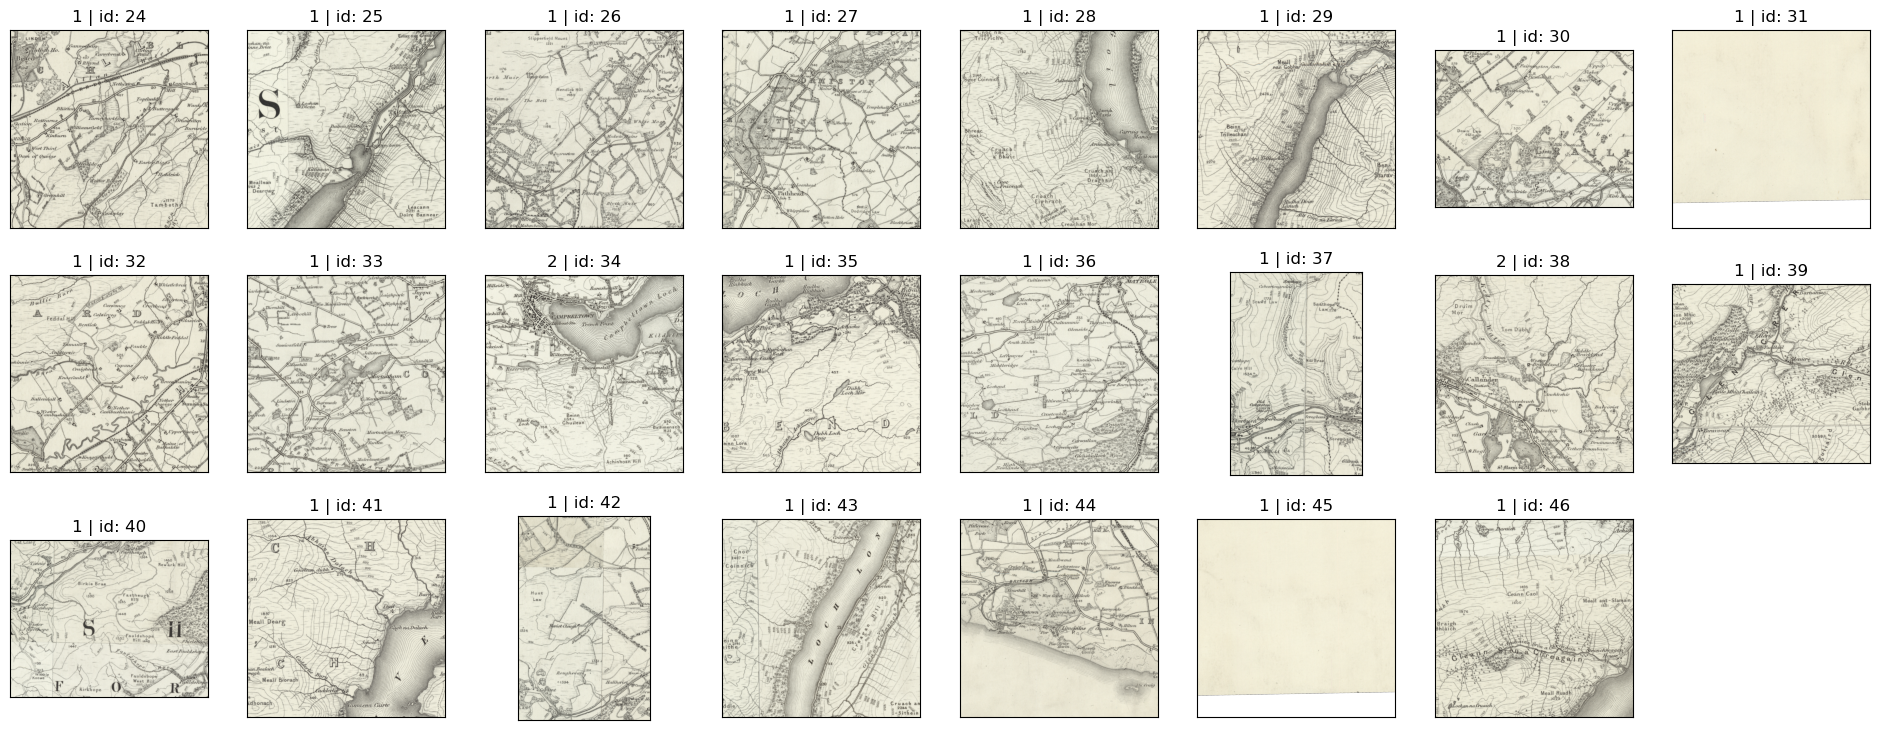

[INFO] IDs of current patches: [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]

Enter IDs, comma separated (or press enter to continue): exit
[INFO] Exited.


In [7]:
annotated_images.review_labels()

### Prepare datasets and dataloaders

SOME EXTRA INFO HERE

In [8]:
dataloaders = annotated_images.create_dataloaders()

[INFO] Creating datasets using default train/val/test split of 0.7:0.15:0.15 and default transformations.
[INFO] Number of annotations in each set:
        - Train:        32
        - Validate:     7
        - Test:         8
[INFO] Using default sampler.


## Train your model

### Set up your classifier

In [10]:
from mapreader import ClassiferContainer

ImportError: cannot import name 'ClassiferContainer' from 'mapreader' (/Users/rwood/miniconda3/envs/mr_test/lib/python3.8/site-packages/mapreader/__init__.py)

In [11]:
my_classifier = ClassiferContainer("resnet18", dataloaders=dataloaders, labels_map=annotated_images.labels_map)

NameError: name 'ClassiferContainer' is not defined

In [12]:
my_classifier.add_criterion("cross-entropy")

NameError: name 'my_classifier' is not defined

In [13]:
params2optimise = my_classifier.generate_layerwise_lrs(min_lr=1e-4, max_lr=1e-3)
my_classifier.initialize_optimizer(params2optimise=params2optimise)

NameError: name 'my_classifier' is not defined

In [14]:
my_classifier.initialize_scheduler()

NameError: name 'my_classifier' is not defined

In [16]:
my_classifier.train(num_epochs=10)

NameError: name 'my_classifier' is not defined